#**Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write neural network for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification 
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples=1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


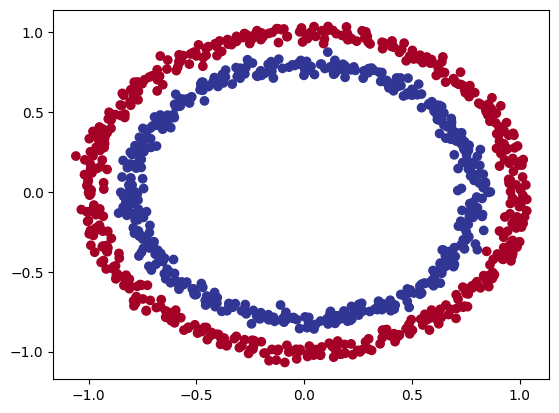

In [5]:
# Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##Input and Output shapes

In [6]:
# Chec the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#How many samples we're working
len(X),len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak 
6. Evaluate...


In [9]:
#Import tensorflow
import tensorflow as tf


In [10]:
# Set the random seed
tf.random.set_seed(42)

#1.Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3. Fit the model
model_1.fit(tf.expand_dims(X,axis=1),y,epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 4ms/step - loss: 1.6047 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.4986
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.4947
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4974
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4938


In [11]:
# Let's try and improve our model by trianing for longer...
model_1.fit(tf.expand_dims(X,axis=1),y,epochs=200,verbose=0)

In [12]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934717297554016, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.. it's performing as if it's guessing.

So let's step things up a notch and an extra layer

In [13]:
#Set the random seed
tf.random.set_seed(42)
#1. Create a model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(tf.expand_dims(X,axis=1),y,epochs=100)
# model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.3411 - accuracy: 0.5004
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.5171 - accuracy: 0.4876
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [14]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increare no of hidden units within a layer
2. Compiling a model - Change the optimization function
3. Fitting a model - fit the model for more epochs

In [16]:
tf.random.set_seed(42)

#1. Create the model (this time 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 3.5480 - accuracy: 0.4949
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5744 - accuracy: 0.5082
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0908 - accuracy: 0.4984
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7493 - accuracy: 0.5026
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7329 - accuracy: 0.4984
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7211 - accuracy: 0.4981
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7145 - accuracy: 0.4997
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.4992
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.5000
Epoch 11/

In [17]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693156898021698, 0.5]


To visualize our model's predictions, let's create a function `plot_decision_boundary()`,  this functiona will

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [18]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model prediction on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  

#Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

#Make predictions
  y_pred = model.predict(x_in)

# Check for multi class
  if len(y_pred[0]) >1:
    print("doing multiclass classification")
    #We have to reshape our prediction to  get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

#Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


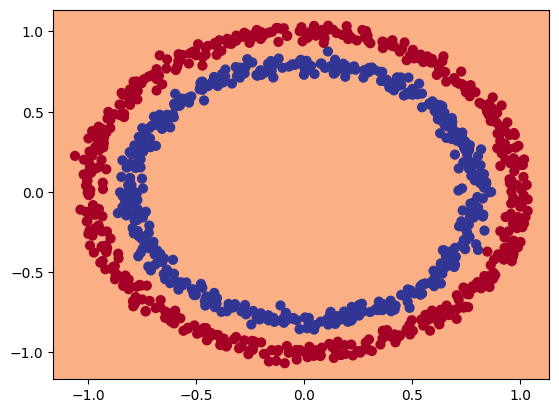

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [20]:
#Let's see of our model can be used for a regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression= tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) #y=X+100

#Split our regression data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

we compiled our model for a binary classification problem.

But.... we're now working on a regression problem, let's change the model to suit our data

In [21]:
# Setup random seed
tf.random.set_seed(42)
#1.Create the model
model_3=tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)  
])

#2.Compile the model, this time with a regression-specific loss function 
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_reg_train,axis=1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 428.1272 - mae: 428.1272
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 304.1677 - mae: 304.1677
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 183.4064 - mae: 183.4064
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 63.0329 - mae: 63.0329
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 79.1952 - mae: 79.1952
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 92.3037 - mae: 92.3037
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 58.5298 - mae: 58.5298
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.8648 - mae: 48.8648
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.8782 - mae: 48.8782
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.0237 - mae: 44.0237
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


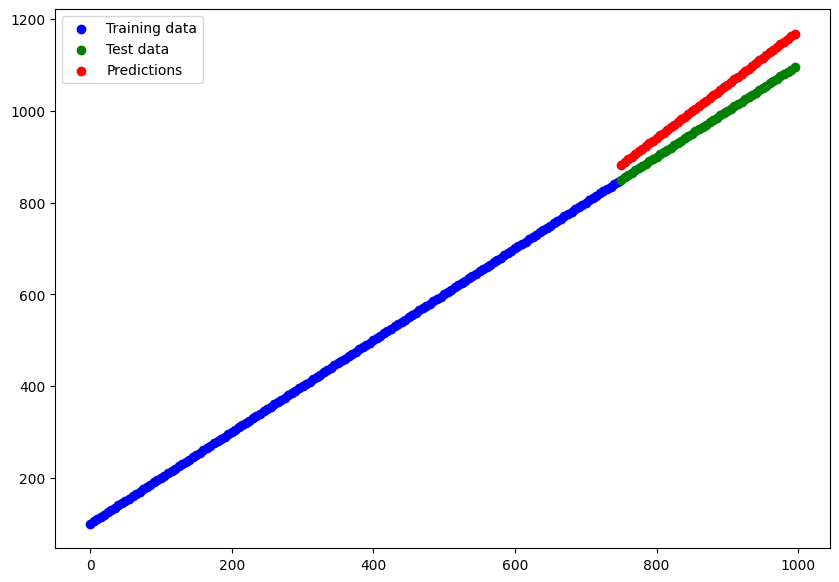

In [22]:
#Make predictions with our trained model
y_reg_preds=model_3.predict(X_reg_test)
#Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds, c="r",label="Predictions")
plt.legend()

## This missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)
#1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear) #activation='linear'
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), #tf.keras.losses.binary_crossentropy
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])
history=model_4.fit(tf.expand_dims(X,axis=1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.6972 - accuracy: 0.4961
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5947 - accuracy: 0.5007
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5994 - accuracy: 0.4967
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5771 - accuracy: 0.5002
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5303 - accuracy: 0.4995
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4082 - accuracy: 0.4959
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2891 - accuracy: 0.4975
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1929 - accuracy: 0.4979
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1288 - accuracy: 0.4982
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0860 - accuracy: 0.5007
Epoch 11/

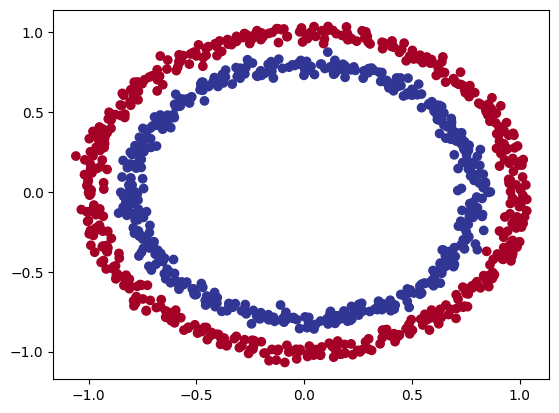

In [24]:
#Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


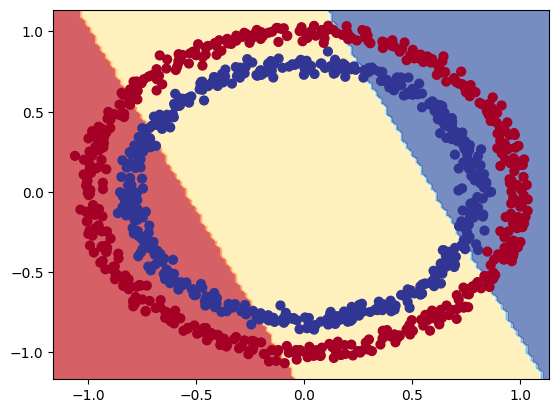

In [25]:
#Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X=X,
                       y=y)

Let's try building our first neural network with a non linear activation function.

In [26]:
#set random seed
tf.random.set_seed(42)

#1.Create a model  with a non linear activation
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])
#2.Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
#3.Fit the model
history=model_5.fit(tf.expand_dims(X,axis=1),y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 4.3625 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 4.0318 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 3.7805 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.4421 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 3.0536 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2800 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 1.4528 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1228 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 1.0795 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0479 - accuracy: 0.5000
Epoch 11/

In [27]:
tf.random.set_seed(42)
#1.Create the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3.Fit the Model
# history=model_6.fit(tf.expand_dims(X,axis=1),y,epochs=100)
history=model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


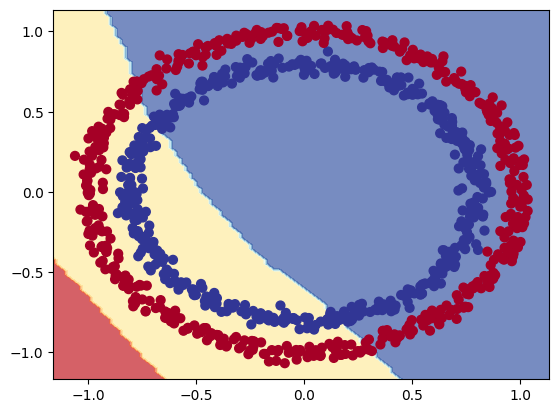

In [29]:
#How do our model predictions look
plot_decision_boundary(model_6,X,y)

In [30]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.6940 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5030
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5080
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.5230
Epoch 11/

In [31]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.9600


[0.33050408959388733, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classification


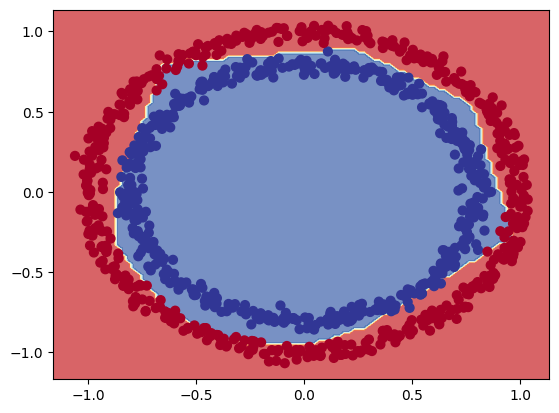

In [32]:
plot_decision_boundary(model_7,X,y)

🤔**Question** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks

Now we've discussed the concept of linear and non linear functions (or lines) lets see them in action


In [33]:
#Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

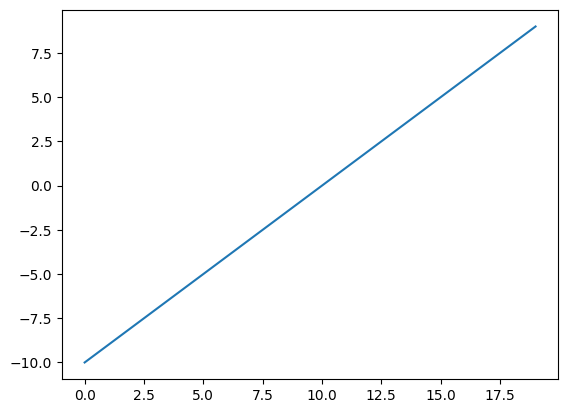

In [34]:
#Visualize our toy tensor
plt.plot(A)

In [35]:
#Let's start by replicating sigmoid - sigmoid(x)= 1 / (1 + exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on our toy tensor
sig=sigmoid(A)

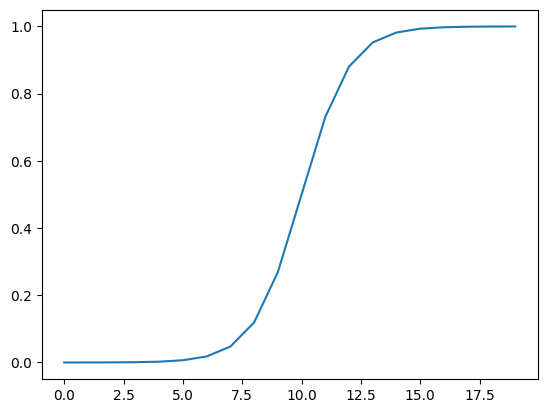

In [36]:
plt.plot(sig)

In [37]:
#Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

rel=relu(A)
rel

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [38]:
#Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

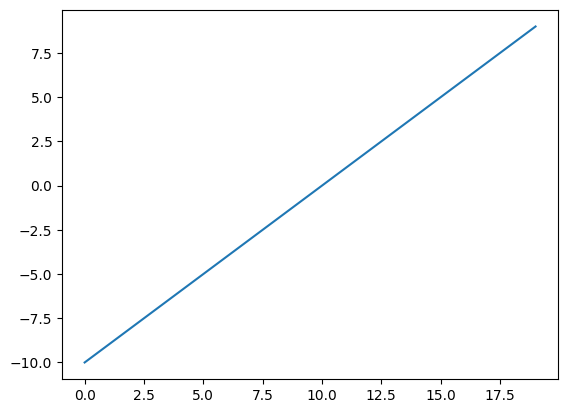

In [39]:
plt.plot(tf.keras.activations.linear(A))

In [40]:
# Does A even change?
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classification model

So far we've been training and testing on the same dataset..

However, in machine learning this is basically a sin.

So let's create a training and test set

In [41]:
#Check how many examples we have
len(X)

1000

In [42]:
#Split in to train and test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
#Let's recreate a model to fit on the training data and evaluate on the testing data

#Set randomseed
tf.random.set_seed(42)

#1.Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])
history=model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4725
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5875
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5925
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.6500
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6606 - accuracy: 0.6875
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.6137
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7237
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7525
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.7188
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7262
Epoch 11/25
25/25 [===========

In [44]:
#Evaluate the model on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9850


[0.15281197428703308, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


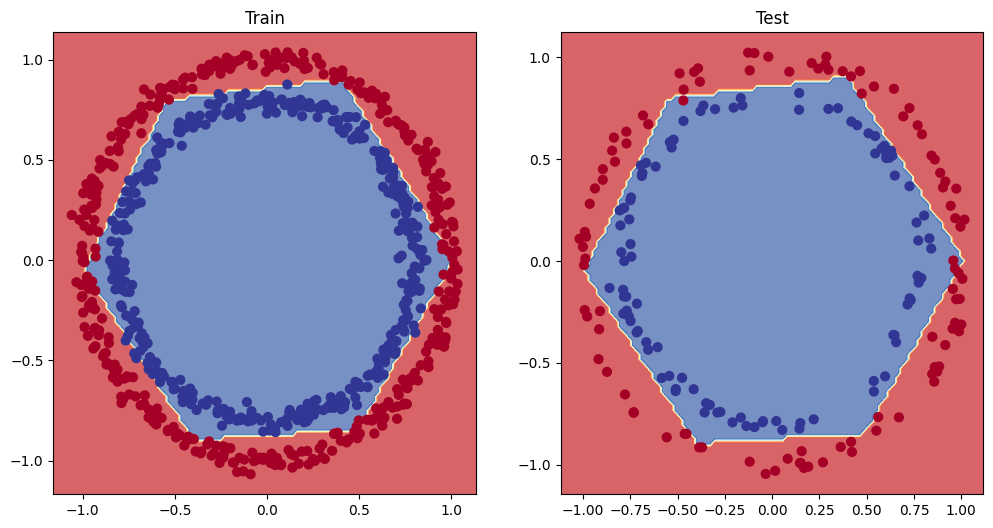

In [45]:
#Plot the decision boundaries for the training and the test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)

##Plot the loss (or training) curves

In [46]:
history.history

{'loss': [0.7076781988143921,
  0.6869293451309204,
  0.677713930606842,
  0.6693822741508484,
  0.6606273055076599,
  0.6486244201660156,
  0.6329877376556396,
  0.6158167123794556,
  0.5945298671722412,
  0.5663702487945557,
  0.5325954556465149,
  0.4954271614551544,
  0.45912739634513855,
  0.41718369722366333,
  0.38003596663475037,
  0.3391229510307312,
  0.30508965253829956,
  0.2819606065750122,
  0.25732991099357605,
  0.23647430539131165,
  0.21701528131961823,
  0.2021489143371582,
  0.18535125255584717,
  0.17973895370960236,
  0.1713239550590515],
 'accuracy': [0.4724999964237213,
  0.5874999761581421,
  0.5924999713897705,
  0.6499999761581421,
  0.6875,
  0.6137499809265137,
  0.7237499952316284,
  0.7524999976158142,
  0.71875,
  0.7262499928474426,
  0.7587500214576721,
  0.8125,
  0.831250011920929,
  0.8774999976158142,
  0.9049999713897705,
  0.9287499785423279,
  0.9375,
  0.9537500143051147,
  0.9549999833106995,
  0.9574999809265137,
  0.956250011920929,
  0.9612

In [47]:
#Convert history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.707678,0.47250
1,0.686929,0.58750
2,0.677714,0.59250
3,0.669382,0.65000
4,0.660627,0.68750
5,0.648624,0.61375
6,0.632988,0.72375
7,0.615817,0.75250
8,0.594530,0.71875
9,0.566370,0.72625


Text(0.5, 1.0, 'Model_8 loss curves')

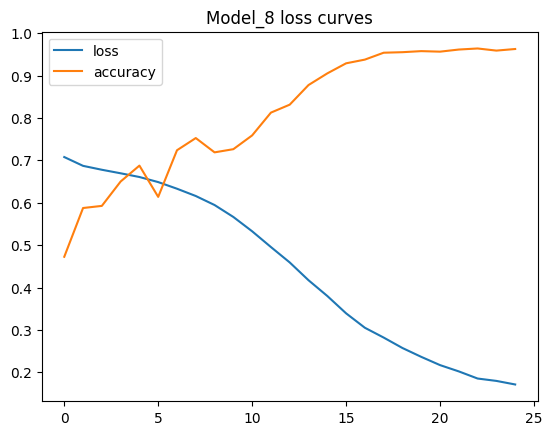

In [48]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🗝️**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
 
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

#Create a model(same as model_8)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics='accuracy')
#Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the model(passing lr_scheduler callback)
history_9=model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6998 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5213 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5188 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

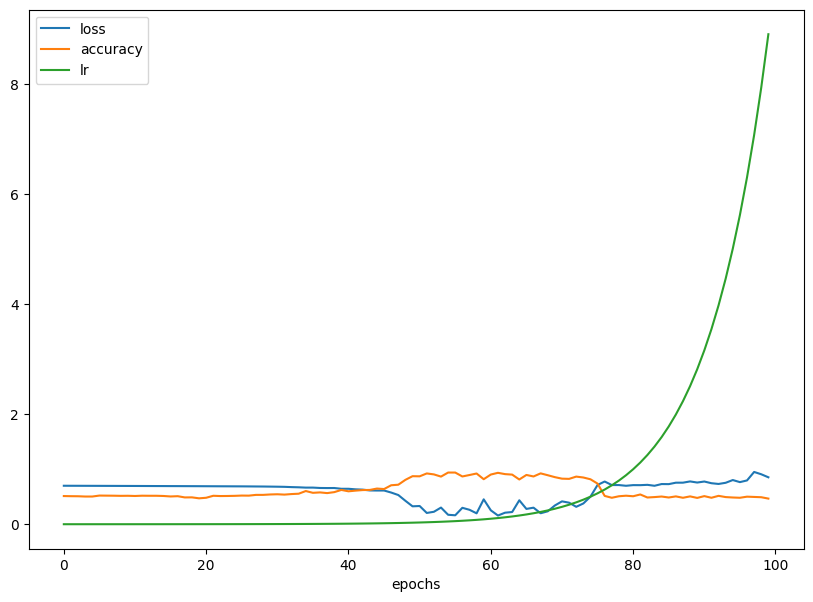

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

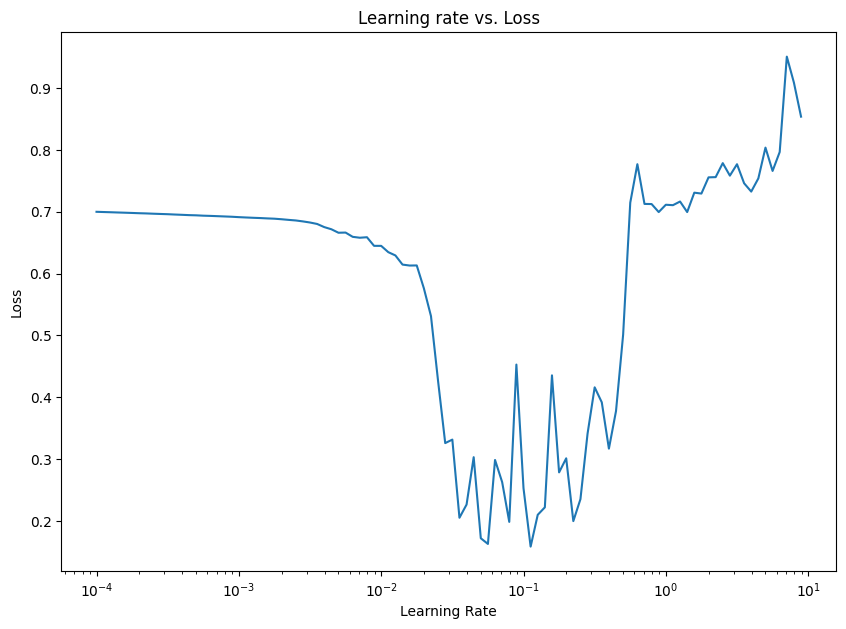

In [51]:
# Plot the learning rate versus the loss
lrs=1e-4*(10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel('Loss')
plt.title("Learning rate vs. Loss")


### Finding the ideal learning rate using the SemiLogx plot

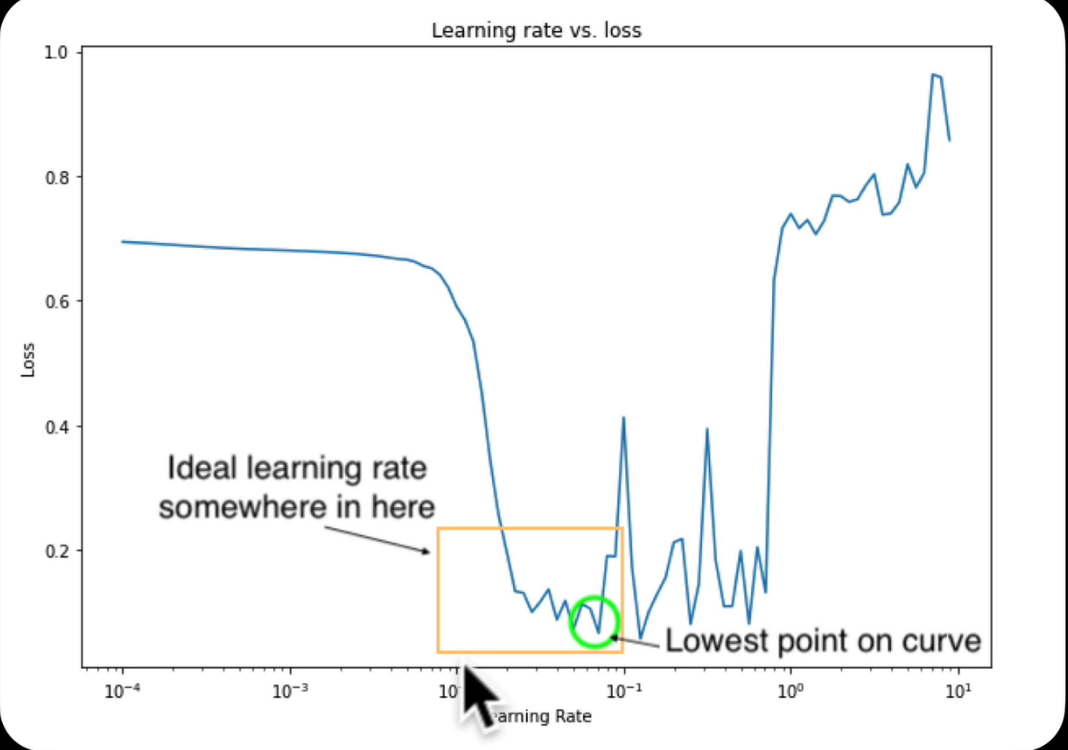

In [52]:
# Example of other typical learning rates values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
# Let's try using a higher *ideal* learning rate with the same model as before

#Set random seed
tf.random.set_seed(42)

#Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                  metrics=['accuracy'])

# Fit the model for 20 epochs(5 less than before)
history_10=model_10.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5238
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5525
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6288
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7250
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7325
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7588
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7663
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8263
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8900
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.9538
Epoch 11/20
25/25 [

In [54]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9800


[0.07317642867565155, 0.9800000190734863]

In [55]:
#Evaluate model 8 on the test dataset
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9850


[0.15281197428703308, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


Text(0.5, 1.0, 'Test')

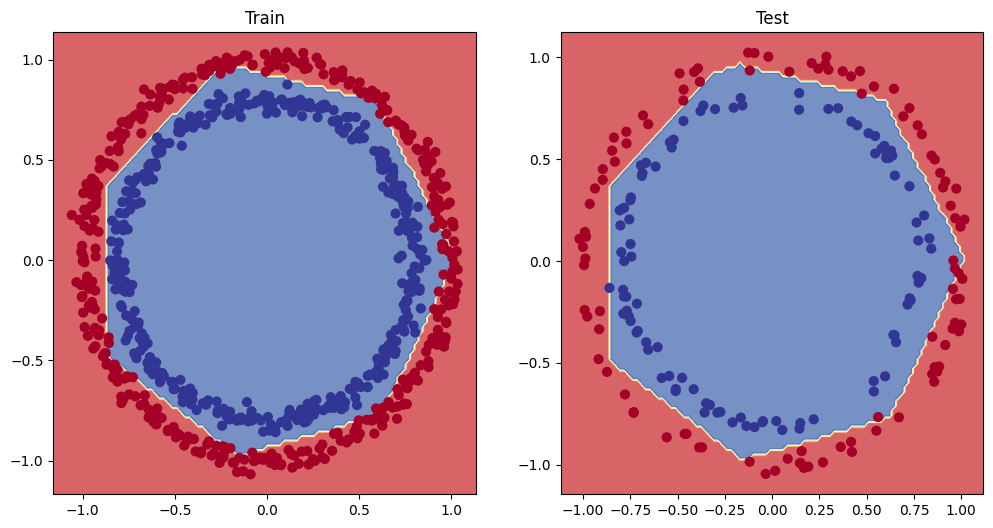

In [56]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.title("Test")

## Classification Evaluation methods

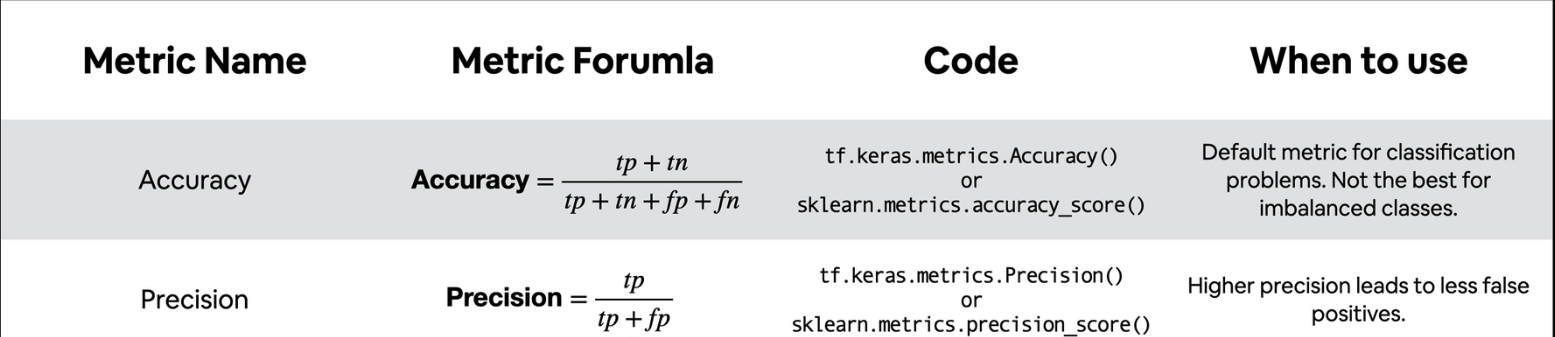
<br>
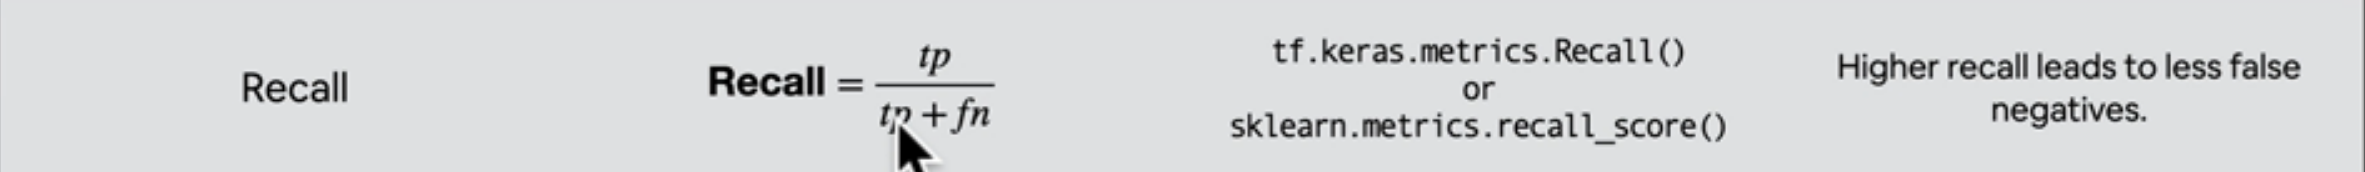

Alongside visualising our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report (from scikit learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html 

In [57]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9800
Model loss on the test set: 0.07317642867565155
Model accuracy on the test set:98.00


How about confusion matrix?

In [58]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
#Make predictions
y_pred=model_10.predict(X_test)

#create confusion matrix
confusion_matrix(y_test,y_pred)


7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [59]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [60]:
y_pred[:10]

array([[0.9823386 ],
       [0.99774665],
       [0.9976534 ],
       [0.9961635 ],
       [0.45878533],
       [0.01454699],
       [0.98390526],
       [0.00281546],
       [0.992434  ],
       [0.04415675]], dtype=float32)

Oops.. looks like our predictions array has come out in **prediction probability** form.... the standard output from the sigmoid (or softmax) activation functions.

In [61]:
#Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [62]:
#Create a confusion matrix 
confusion_matrix(y_test,tf.round(y_pred))

array([[97,  4],
       [ 0, 99]])

How about we prettify our confusion matrix?

**Note:** the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

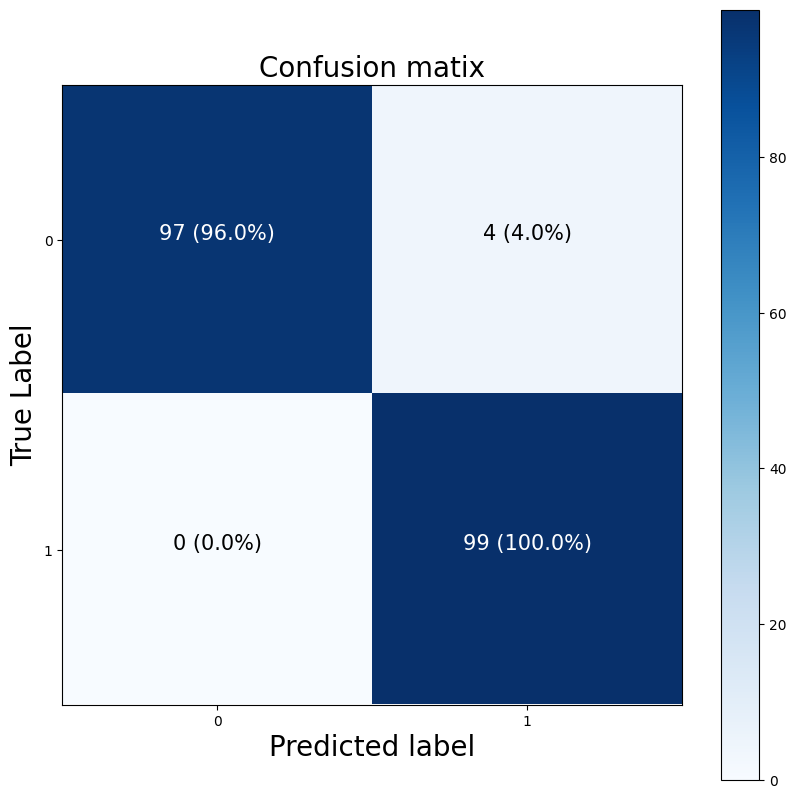

In [63]:
import itertools
figsize=(10,10)
#Create the confusion matrix

cm=confusion_matrix(y_test,tf.round(y_pred))

cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #Normalize our confusion matrix
n_classes=cm.shape[0]

#Let's prettify it 
fig,ax=plt.subplots(figsize=figsize)
#Create a matrix plot 
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes= False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion matix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors
threshold=(cm.max()+cm.min())/2.

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j]>threshold else "black",
           size=15)

#Working with a larger example(multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means it you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multiclass classification.

To practive multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [65]:
#The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
#Check the shape of a single example
train_data[0].shape, train_labels[7].shape

((28, 28), ())

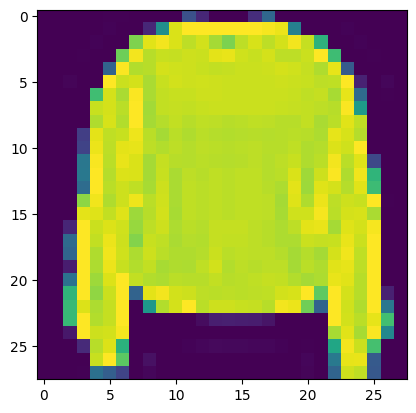

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [69]:
# Check out samples labels
train_labels[7]

2

In [70]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat",'Sandal',"Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

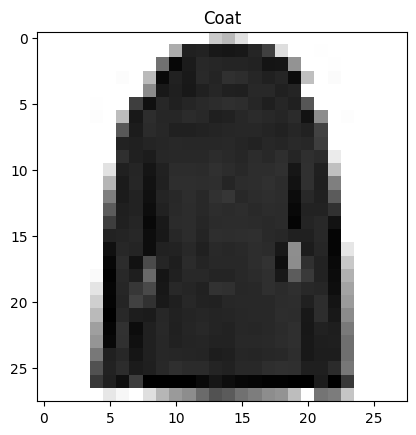

In [71]:
# Plot an example image and its label
index=2000
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

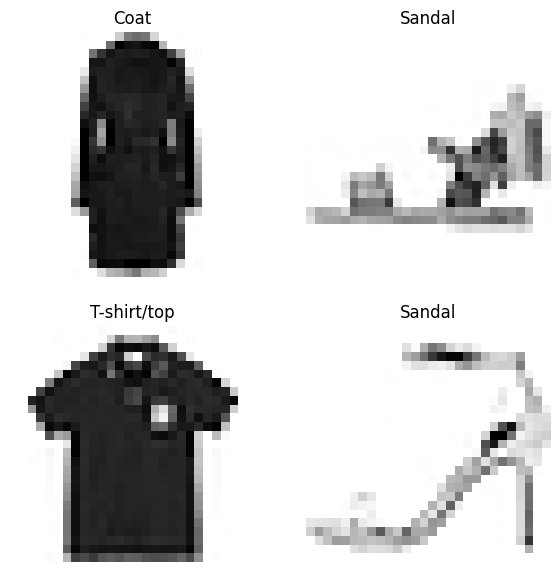

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Building a multi-class classification model

The key difference between binary classification and multi-class classification
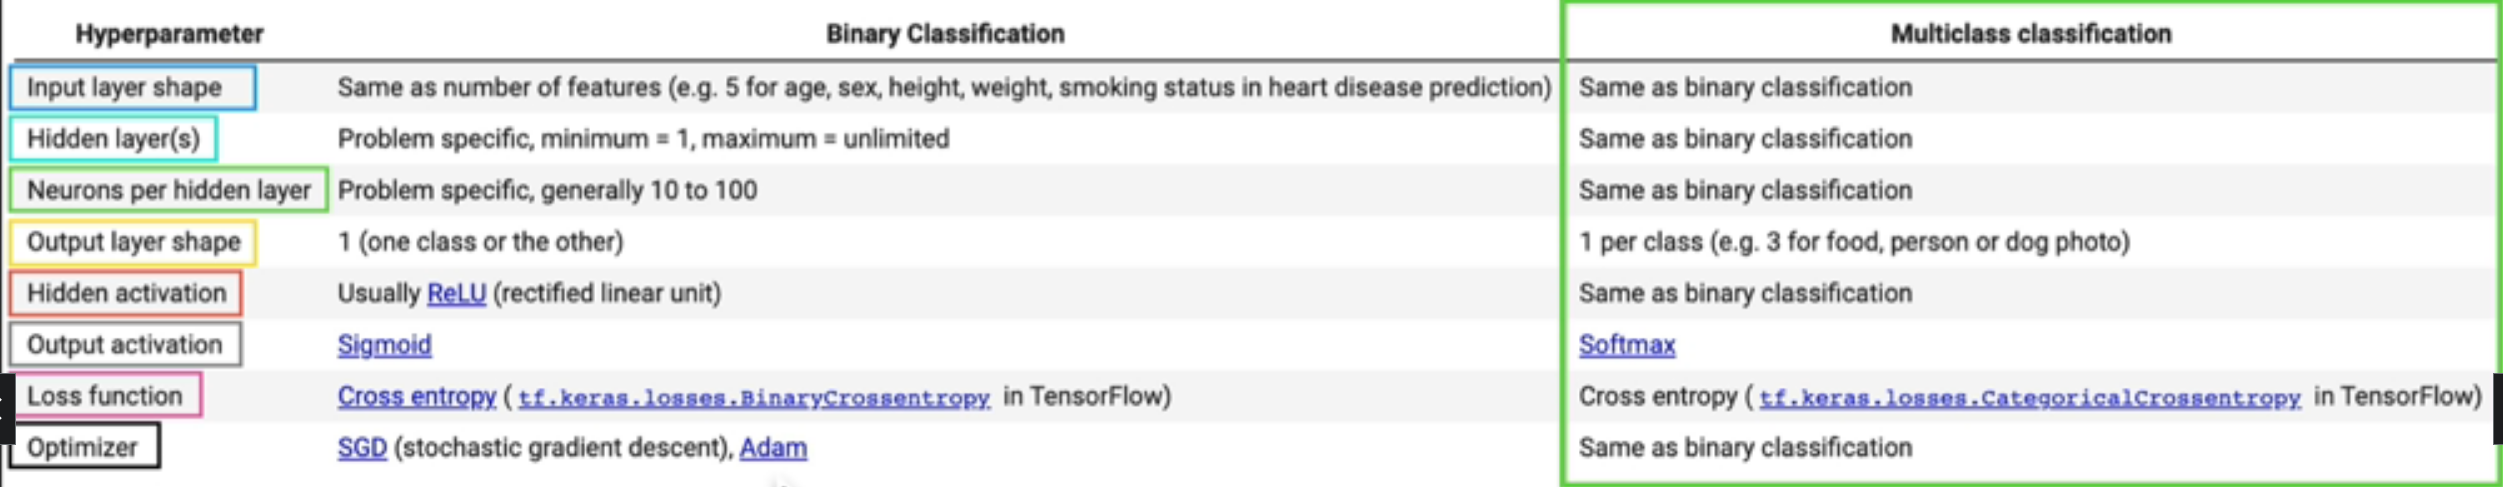

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (1 per class or clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output activation = Softmax (not Sigmoid)

In [73]:
# Our data needs to be flattened(from 28*28 to None,784)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [74]:
28 * 28

784

In [75]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [76]:
#Set random seed
tf.random.set_seed(42)

# Create a model
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')#tf.keras.activations.softmax
])

#Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

#Fit the model
non_norm_history=model_11.fit(train_data,
                              tf.one_hot(train_labels, depth=10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.4283 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3030 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [77]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [78]:
 # Check the min and max of the training data
 train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they  like to have numbers in the tensors they try to find patterns between 0 & 1.

In [79]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm =train_data/255.0
test_data_norm = test_data / 255.0

#Check the min and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [80]:
# Now our data is normalized, let's build a model to find patterns in it

#Set random seed
tf.random.set_seed(42)

# Create a model(same as model 11)
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

#Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
norm_history=model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3816 - accuracy: 0.5057 - val_loss: 0.9292 - val_accuracy: 0.6937
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8207 - accuracy: 0.7064 - val_loss: 0.7758 - val_accuracy: 0.7063
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7224 - accuracy: 0.7168 - val_loss: 0.7188 - val_accuracy: 0.7138
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6837 - accuracy: 0.7240 - val_loss: 0.6874 - val_accuracy: 0.7335
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6554 - accuracy: 0.7478 - val_loss: 0.6639 - val_accuracy: 0.7517
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6346 - accuracy: 0.7609 - val_loss: 0.6730 - val_accuracy: 0.7521
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6225 - accuracy: 0.7681 - val_loss: 0.6444 - val_accuracy

🗝️**Note:** Neural Networks tend to prefer data in numeric form as well as scaled/normalized (numbers between 0 and 1).

<Axes: title={'center': 'Normalized data'}>

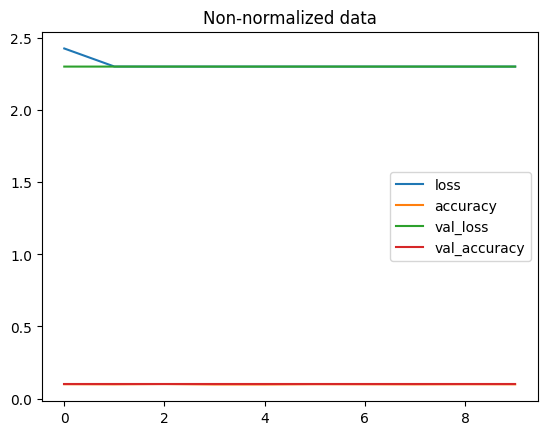

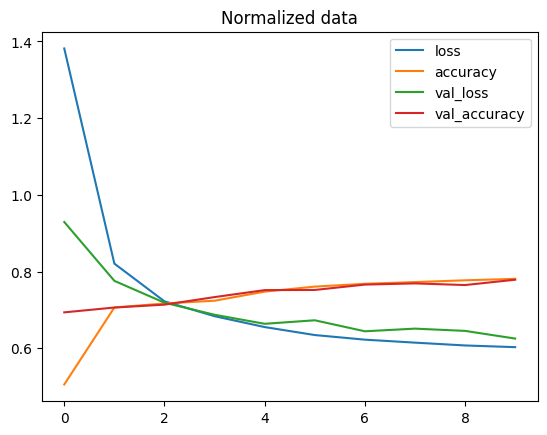

In [81]:
import pandas as pd
# Plot the non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

🗝️**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to  make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [82]:
# Set the random seed
tf.random.set_seed(42)

#Create the model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
              )
#Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

#Fit the model
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm,test_labels),
                             callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3443 - accuracy: 0.4788 - val_loss: 1.0350 - val_accuracy: 0.6210 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9309 - accuracy: 0.6638 - val_loss: 0.8795 - val_accuracy: 0.6920 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8048 - accuracy: 0.7171 - val_loss: 0.7866 - val_accuracy: 0.7291 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7373 - accuracy: 0.7348 - val_loss: 0.7233 - val_accuracy: 0.7457 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6871 - accuracy: 0.7467 - val_loss: 0.7120 - val_accuracy: 0.7434 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6603 - accuracy: 0.7547 - val_loss: 0.6892 - val_accuracy: 0.7491 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

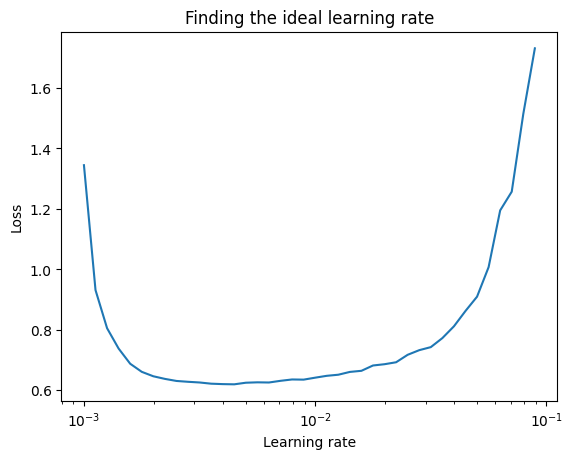

In [83]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [84]:
 10**-3

0.001

In [105]:
# Let's refit the model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

#Create the model
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

#Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                 metrics=['accuracy'])

# Fit the model
history_14=model_14.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1582 - accuracy: 0.5388 - val_loss: 0.8330 - val_accuracy: 0.6895
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7655 - accuracy: 0.7064 - val_loss: 0.7474 - val_accuracy: 0.7100
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7121 - accuracy: 0.7198 - val_loss: 0.7126 - val_accuracy: 0.7210
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6813 - accuracy: 0.7321 - val_loss: 0.6892 - val_accuracy: 0.7278
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6573 - accuracy: 0.7382 - val_loss: 0.6767 - val_accuracy: 0.7353
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6405 - accuracy: 0.7427 - val_loss: 0.6668 - val_accuracy: 0.7310
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6339 - accuracy: 0.7416 - val_loss: 0.6527 - val_accuracy:

## Evaluating our multi-class classfication model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results(by training it for longer or changing the architecture)
*Save and export it for use in an application

Let's go through the top 2....

In [86]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
#Create the confusion matrix

  cm=confusion_matrix(y_true,tf.round(y_pred))

  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #Normalize our confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it 
  fig,ax=plt.subplots(figsize=figsize)
  #Create a matrix plot 
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matix",
        xlabel="Predicted label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colors
  threshold=(cm.max()+cm.min())/2.

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j]>threshold else "black",
            size=text_size)

In [106]:
#Make some predictions with our model
y_probs=model_14.predict(test_data_norm) # probs is short for "prediction probabilities".

#View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.7401576e-09, 2.1159633e-16, 4.7365464e-15, 7.4769882e-06,
        2.3460794e-08, 2.6023778e-01, 1.1594723e-08, 8.8602766e-02,
        5.5326498e-05, 6.5109658e-01],
       [1.4111138e-02, 7.7029136e-03, 7.3254591e-01, 8.9851366e-03,
        1.4697044e-01, 5.9445892e-06, 8.9462712e-02, 7.2464621e-07,
        2.1504206e-04, 8.1341627e-09],
       [2.8227537e-04, 9.9905437e-01, 1.1970211e-04, 5.3874764e-04,
        9.2474139e-08, 1.1261092e-19, 4.8258908e-06, 1.0076562e-12,
        2.3801528e-11, 1.5383081e-15],
       [2.4859660e-04, 9.7431809e-01, 5.0664007e-06, 2.5426205e-02,
        7.5763393e-07, 1.2245734e-17, 1.3822992e-06, 5.0883542e-10,
        8.3311677e-11, 3.8861199e-11],
       [9.4109304e-02, 9.4021839e-04, 4.4827452e-01, 1.4847172e-02,
        1.5869195e-02, 4.7114571e-07, 4.2269805e-01, 1.4869472e-06,
        3.2595065e-03, 7.7830214e-11]], dtype=float32)

>🗝️**Note:** Remember to make predictions on the same kind of data your model is trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [107]:
y_probs[0],tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([4.7401576e-09, 2.1159633e-16, 4.7365464e-15, 7.4769882e-06,
        2.3460794e-08, 2.6023778e-01, 1.1594723e-08, 8.8602766e-02,
        5.5326498e-05, 6.5109658e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [108]:
# Convert all of the prediction probabilities into integers 
y_pred=y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_pred[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

In [109]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_pred)

array([[732,   9,  48,  78,   7,   0, 115,   0,  11,   0],
       [  2, 941,  17,  33,   4,   1,   2,   0,   0,   0],
       [ 21,   2, 707,  10, 177,   1,  79,   0,   3,   0],
       [ 20,  27,  20, 835,  41,   4,  51,   0,   2,   0],
       [  1,   4, 179,  36, 730,   0,  47,   0,   3,   0],
       [  0,   0,   0,   8,   2, 866,   2,  54,  15,  53],
       [171,   5, 144,  52, 213,   1, 395,   0,  19,   0],
       [  0,   0,   0,   1,   0,  28,   0, 920,   1,  50],
       [  3,   0,   4,  11,   3,  13,  82,   4, 880,   0],
       [  0,   0,   0,   2,   0,  21,   0,  42,   1, 934]])

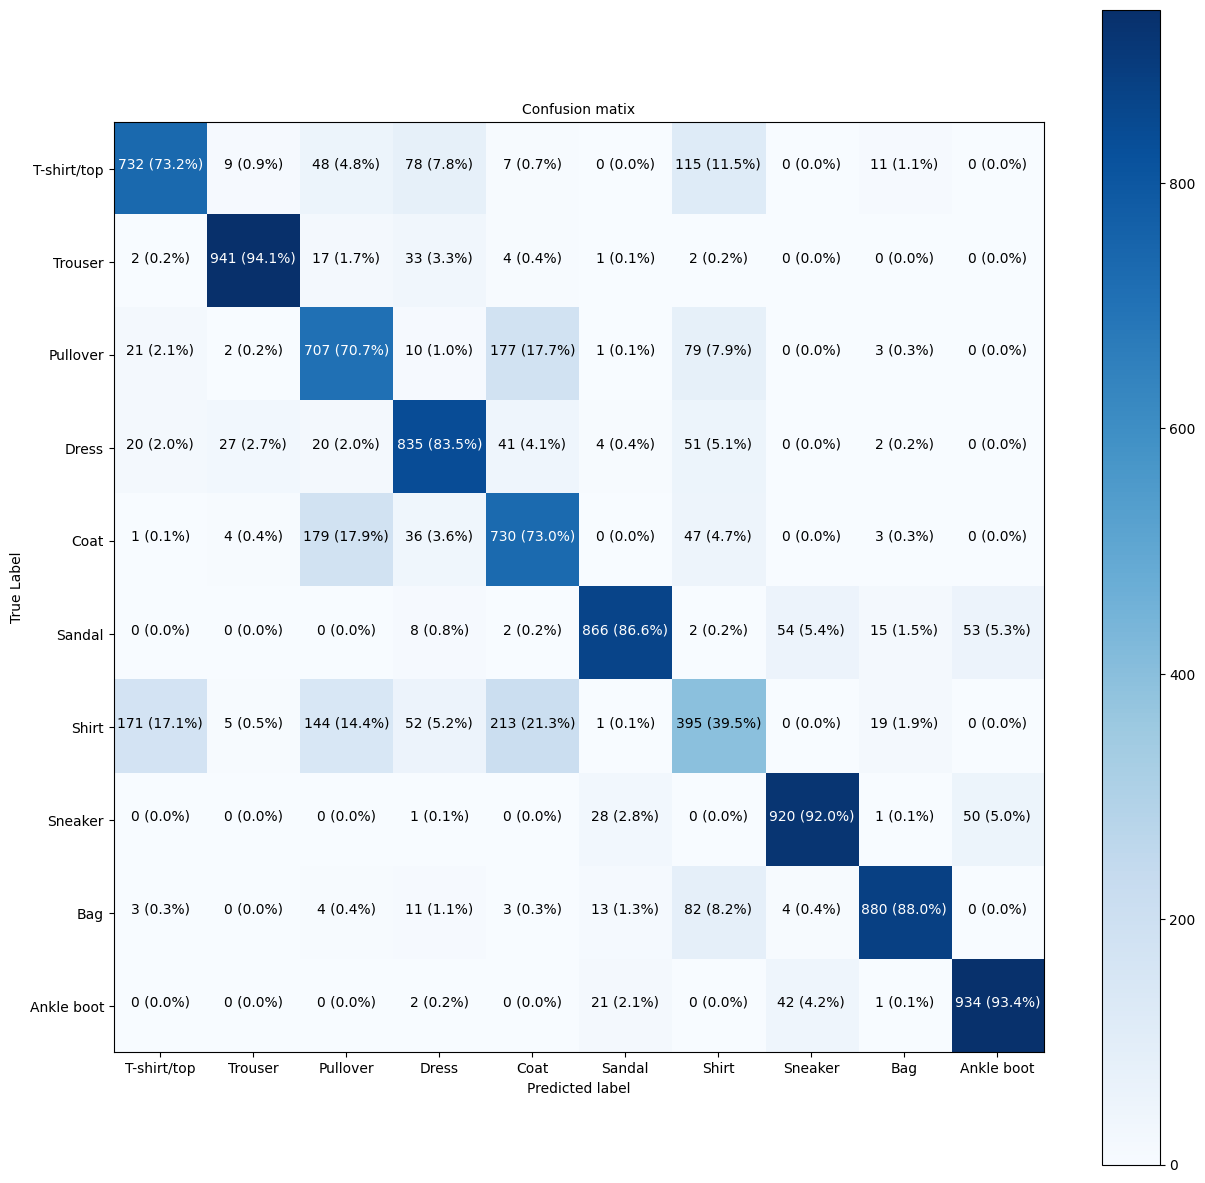

In [111]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,y_pred=y_pred,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)


>🗝️**Note:** Often when working with images and other forms of visual data,it's a good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label the plot with the truth label & the predicted label


In [114]:
import random 

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  #Set up random integer
  i=random.randint(0,len(images))
  # Create predictions and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  #Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color) #set the color to green or red based on if prediction is right or wrong



1/1 [==============================] - 0s 26ms/step


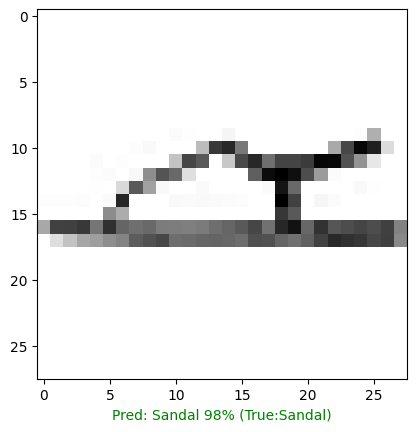

In [131]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, #always make prediction on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [132]:
#Find the layers of our most recent model
model_14.layers

In [133]:
# Extract a particular layer
model_14.layers[1]

In [141]:
#Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapers
weights,weights.shape

(array([[ 7.2512680e-01,  2.7746685e-02, -4.6869349e-01,  1.0112532e+00],
        [ 2.3351057e+00, -5.9203915e-02, -9.9714708e-01,  2.2121625e+00],
        [ 9.1578561e-01,  8.0997750e-02, -1.6672032e+00,  1.8219519e+00],
        ...,
        [ 2.9758307e-01, -4.3802030e-02, -1.0021528e-01, -4.5785168e-01],
        [-1.1755024e+00, -3.0659802e-02, -6.2997234e-01,  7.5719595e-01],
        [ 1.7308644e+00, -2.1441281e-03, -3.9861193e-01, -3.1763941e-01]],
       dtype=float32),
 (784, 4))

In [136]:
28 * 28

784

In [137]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector

In [142]:
# Bias and biases shape
biases,biases.shape


(array([ 3.117937  , -0.01802957,  4.5641117 ,  3.012149  ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix. 

The bias vector get initialized as zeros (at least in the case of TensorFlow dense layers).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


In [144]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


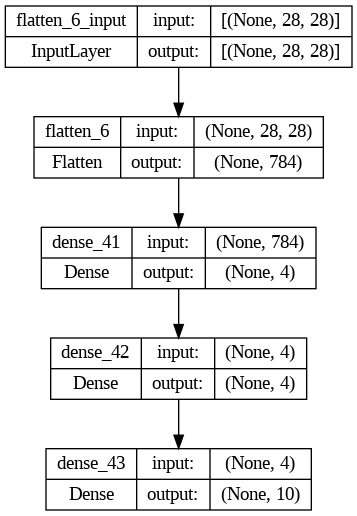

In [146]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
#See the inputs and outputs of each layer
plot_model(model_14,show_shapes=True)